# Chapter 13: The Information Horizon

## Summary

Information has a time dimension, arriving at different rates and is valuable over longer or shorter periods

- The information horizon should be defined as the half-life of the information's forecasting ability
- A strategy's horizon is an intrinsic property.  Time averages or time differences can change performance, but they will not change the horizon.
- Lagged signals or scores and past returns can improve investment performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

## Macro-Analysis of the Information Horizon

- A reasonable measure of the decay rate is the _half-lfe_ the time it takes for the information ratio to drop to one-half of its value when implemented with immediacy.
- As the ability to add value is proportional to the square of the information ratio, thus the half-life for adding value is one-half that of the information ratio

Given a decay rate of $\gamma$ and a correlation of $\rho$ the optimal weight on Now is

$$\boxed{ \omega_{Now}^{*} = \frac{\gamma +x}{\gamma + 1} }$$

where

$$\boxed{ x \equiv \frac{1 -\gamma}{1 - \rho} }$$

Note: The optimal mix of Now and Later will improve performance, _although it will not change the horizon_.  If we make an optimal mix of the old portfolios, the information will increase, but the horizon (half-life) of the resulting strategy will be exactly the same as the horizon of the original strategy.




In [2]:
def calc_x(gamma, rho):
    return (1-gamma)/(1-rho)

def optimal_now_weight(gamma, rho):
    x = calc_x(gamma, rho)
    return (gamma+x)/(gamma+1)

def ir_combined(ir_now, gamma, rho):
    x = calc_x(gamma, rho)
    return ir_now * ( (gamma+x) + gamma*(1-x) ) / ( np.sqrt( (gamma+x)**2 + (1-x)**2 + 2*(gamma+x)*(1-x)*rho ) )

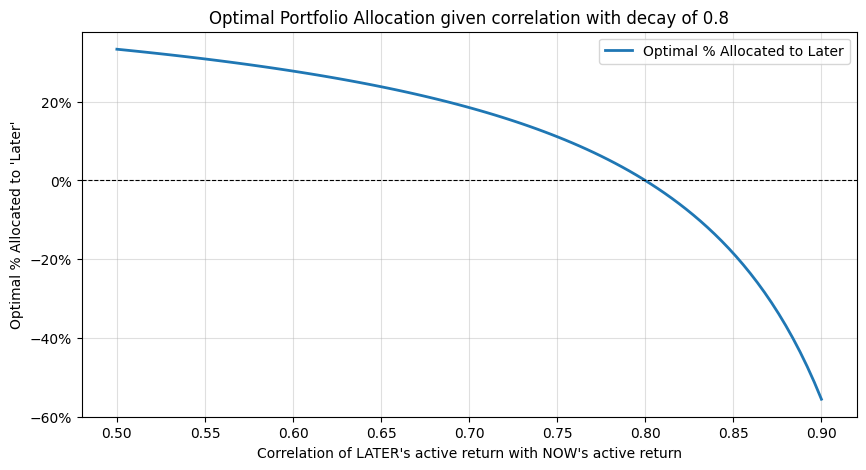

In [3]:
gamma = 0.8
rho = np.linspace(0.5, 0.9, 100)

later_weights = 1 - optimal_now_weight(gamma, rho)

plt.figure(figsize=(10, 5))
plt.plot(rho, later_weights, label="Optimal % Allocated to Later", linewidth=2)
plt.title(f"Optimal Portfolio Allocation given correlation with decay of {gamma:.1f}")
plt.xlabel("Correlation of LATER's active return with NOW's active return")
plt.ylabel("Optimal % Allocated to 'Later'")
plt.grid(alpha=0.4)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

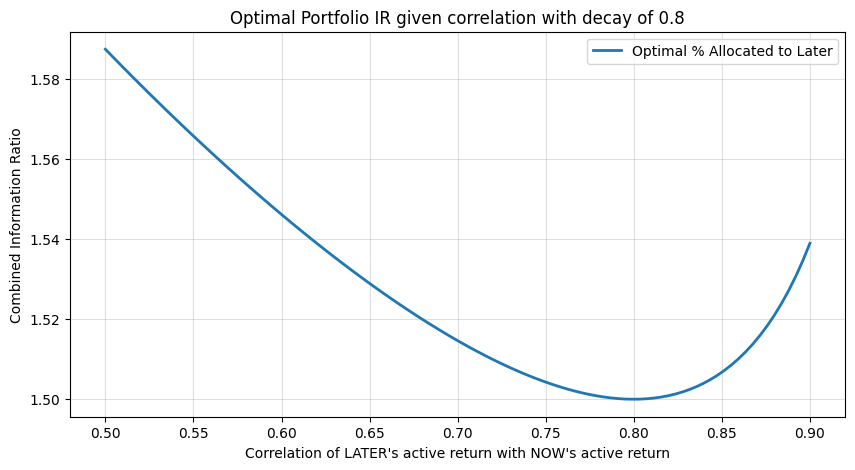

In [4]:
ir_now = 1.5
ir_c = ir_combined(ir_now, gamma, rho)

plt.figure(figsize=(10, 5))
plt.plot(rho, ir_c, label="Optimal % Allocated to Later", linewidth=2)
plt.title(f"Optimal Portfolio IR given correlation with decay of {gamma:.1f}")
plt.xlabel("Correlation of LATER's active return with NOW's active return")
plt.ylabel("Combined Information Ratio")
plt.grid(alpha=0.4)
plt.legend()
plt.show()

## Micro-Analysis of the Information Horizon

- Focus on the case of one asset (one time series).  Has a return of $r(0,\Delta(t)$ over a time period between 0 and $\Delta t$
- Assume expected return is 0
- Volatility of the return is $\sigma$ times the square root of $\Delta t$
- We assume in general that asset returns are uncorrelated
- Information arrives periodically, in bundles we call scores at time lengths of $\Delta t$. (standardised mean 0 and std-dev 1)
- The prediction (alpha) depends on the arrival rate and shelf lif of that information

Following noting that $IC(\Delta t)$ is the correlation score with the return over the period $\{0, \Delta t\}$ that

$$\boxed{ \alpha(\Delta t) = (\sigma \cdot \sqrt{\Delta t}) \cdot IC(\Delta t) \cdot s(0) }$$

And from the fundamental law of active management that

$$\boxed{ IR^{2} = [IC(\Delta t)]^{2} \cdot \left( \frac{1}{\Delta t} \right) }$$

where breadth BR is simply the inverse of the period $(1/\Delta t)$

**Two-Period Shelf Life**
- Above we had 'just in time' information where inter-arrival time $\Delta t$ matched the shelf life $\Delta t$

Now consider where the inter-arrival time is shorter than the self life - in below case where shelf life of a score is two periods long then

$$\boxed{ IC_{1\&2} = \frac{IC_{1} + IC_{2}}{\sqrt{2}} }$$

The earlier result (Chapter 10) of optimally combining two signals applies here as well - and we find

$$\boxed{ IC^{*} = \sqrt{ \frac{ IC_{1}^{2} + IC_{2}^{2} - 2 \cdot IC_{1} \cdot IC_{2} \cdot \rho }{1 - \rho^{2}} } } $$


In [5]:
def adjusted_ic(ic_1, ic_2, rho):
    return (ic_1 - rho*ic_2)/(1-rho**2)

def ic_combined(ic_1, ic_2, rho):
    return np.sqrt( (ic_1**2 + ic_2**2 - 2*ic_1*ic_2*rho ) / (1-rho**2) )

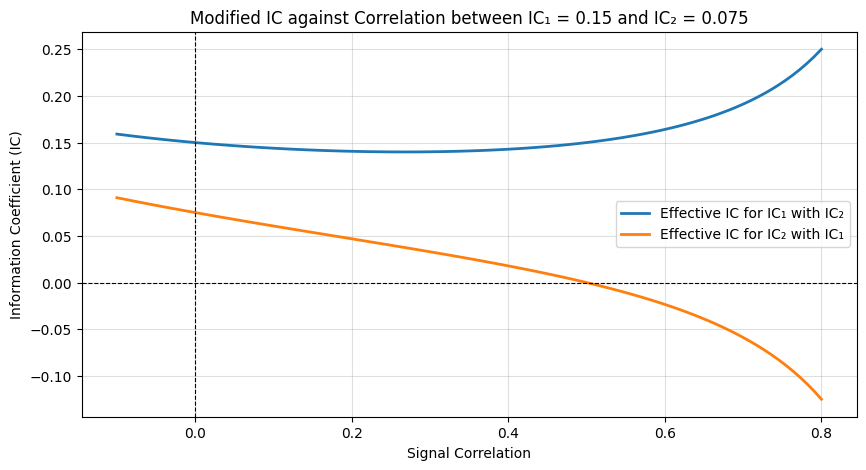

In [6]:
ic_1 = 0.15
ic_2 = 0.075
rho = np.linspace(-0.1, 0.8, 100)

plt.figure(figsize=(10, 5))
plt.plot(rho, adjusted_ic(ic_1, ic_2, rho), label="Effective IC for IC₁ with IC₂", linewidth=2)
plt.plot(rho, adjusted_ic(ic_2, ic_1, rho), label="Effective IC for IC₂ with IC₁", linewidth=2)
plt.title(f"Modified IC against Correlation between IC₁ = {ic_1} and IC₂ = {ic_2}")
plt.xlabel("Signal Correlation")
plt.ylabel("Information Coefficient (IC)")
plt.grid(alpha=0.4)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.legend()
plt.show()

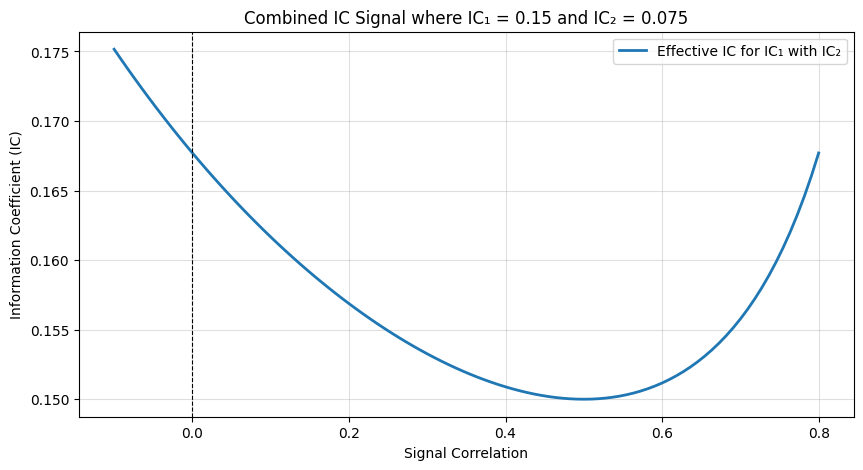

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(rho, ic_combined(ic_1, ic_2, rho), label="Effective IC for IC₁ with IC₂", linewidth=2)
plt.title(f"Combined IC Signal where IC₁ = {ic_1} and IC₂ = {ic_2}")
plt.xlabel("Signal Correlation")
plt.ylabel("Information Coefficient (IC)")
plt.grid(alpha=0.4)
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.legend()
plt.show()

The lagged score can help improve the forecast in one of two ways

- _Diversification_ as a second predictor of the return of $r(0,\Delta t)$
- _Hedging_ as a way of reducing the noise in s(0)



## Gradual Decline in the Value of the Information

The one and two period models above are easy to analyse but are not realistic.  More sensible information model is one of gradual decline in forecasting power. The IC decays as we move more periods away from the arrival of the information.

In general the correlation with a return in month n+1 is $IC \cdot \delta^{n}$

This relates to continuous decay using half-life

$$ \boxed{ \delta = \left( \frac{1}{2} \right)^{\Delta t/HL} } $$

or

$$ \boxed{ HL = \frac{-\Delta t \cdot ln\{2\}}{ln\{\delta\}} } $$


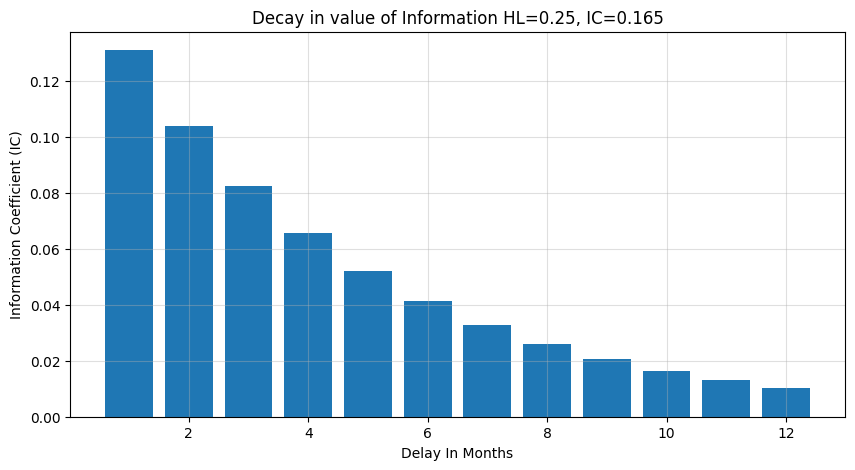

In [8]:
def decay(delta_t, HL):
    return 0.5**(delta_t/HL)

HL = 0.25  # (1 quarter)
ic_0 = .165
delta = 0.7937

delay_months = np.array(range(1,13))
decayed_ic = decay(delay_months/12, HL)*ic_0

plt.figure(figsize=(10, 5))
plt.bar(delay_months, decayed_ic)
plt.title(f"Decay in value of Information HL={HL}, IC={ic_0}")
plt.xlabel("Delay In Months")
plt.ylabel("Information Coefficient (IC)")
plt.grid(alpha=0.4)
plt.show()

The correlation of the returns with the signal over longer and longer periods can be shown to be

$$ \boxed{ IC(0,t) = Corr\{r(0,t),s(0)\} = IC \cdot \sqrt{ \frac{\Delta t}{t} } \cdot \frac{1 - \delta^{t/\Delta t}}{1-\delta}  }  $$

where the IC is the information coefficient over the initial period of length $\Delta t$

The signal has its highest predictive power when the horizon is about twice the half-life of the signal.

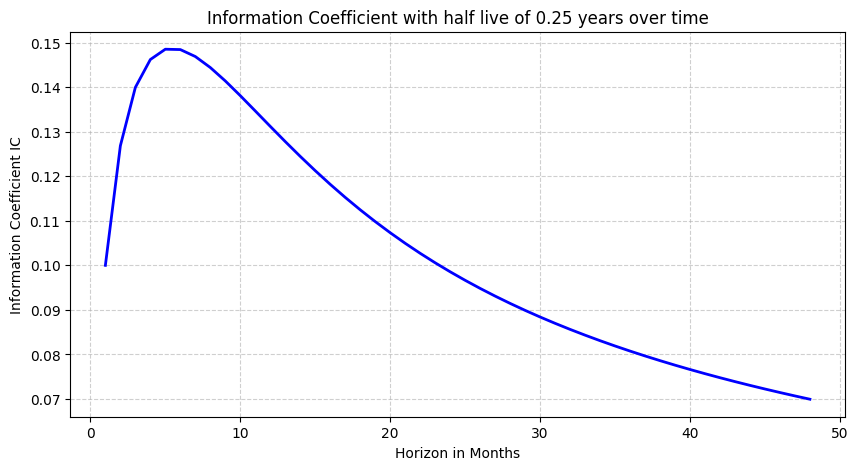

In [9]:
def ic_t( ic_0, delta_t, t, delta):
    return  ic_0 * np.sqrt( delta_t/t ) * (1-delta**(t/delta_t))/(1-delta)

ic_0 = 0.1
horizon_months =  np.arange(1, 49)
ic = ic_t( ic_0, 1, horizon_months, delta)

plt.figure(figsize=(10, 5))
plt.plot(horizon_months, ic, label="IC(0, t)", color="blue", linewidth=2)
plt.title(f"Information Coefficient with half live of {HL} years over time")
plt.xlabel("Horizon in Months")
plt.ylabel("Information Coefficient IC",)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

As the signals arrive we can use the most recent, or we can attempt to combine the new and old in order to obtain a more powerful forecast.

The ability to improve still relies on the two parameters

- The decay factor $\delta$
- The correlation $\rho$ between the adjacent scores

If

- $\delta = \rho$ then the most recent score has all the information we need
- $\delta > \rho$ then we can diversify by using past scores to reinforce the information
- $\delta < \rho$ we can use past signals to hedge the noise in the most recent signal

